In [ ]:
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Activation, Flatten, concatenate, Input, Add
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras
from matplotlib import pyplot as plt

# Load EOG data (2 eyes)

In [ ]:
import os
import scipy.io as sio
from natsort import natsorted
# load eog data
eog1_path = r'/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_raw_data/EOG1/'
excerpt_eog1 = os.listdir(eog1_path)
excerpt_eog1 = natsorted(excerpt_eog1)
print(excerpt_eog1)
f = sio.loadmat('/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_raw_data/EOG1/' + excerpt_eog1[0])
data1 = f['EOG1']
# data1 = f['EOG1']
# c,r = data1.shape
# train_c = (c//10)*8
# label_c = c - train_c
# subject_partition_train_eog1 = data1[0:train_c,:]
# subject_partition_valid_eog1 = data1[train_c:,:]
eog1 = data1
# print('train: ',subject_partition_train_eog1.shape)
# print('valid: ',subject_partition_valid_eog1.shape)
print('eog1 ',eog1.shape)

for name in excerpt_eog1[1:]:
  f = sio.loadmat('/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_raw_data/EOG1/' + name)
  #print(f)
  data1 = f['EOG1']
  # data1 = f['EOG1']
  #print(data.shape)
  # c,r = data1.shape
  # train_c = (c//10)*8
  # label_c = c - train_c
  # train_data1 = data1[0:train_c,:]
  # valid_data1 = data1[train_c:,:]
  # subject_partition_train_eog1 = np.append(subject_partition_train_eog1, train_data1, axis=0)
  # subject_partition_valid_eog1 = np.append(subject_partition_valid_eog1, valid_data1, axis=0)
  eog1 = np.append(eog1, data1, axis=1) #whole
  # print('train: ',subject_partition_train_eog1.shape)
  # print('valid: ',subject_partition_valid_eog1.shape)
  print('eog1',eog1.shape)
eog1 = np.transpose(eog1)
print('eog1',eog1.shape)


eog2_path = r'/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_raw_data/EOG2/'
excerpt_eog2 = os.listdir(eog2_path)
excerpt_eog2 = natsorted(excerpt_eog2)
print(excerpt_eog2)
f = sio.loadmat('/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_raw_data/EOG2/' + excerpt_eog2[0])
data2 = f['EOG2']
# data2 = f['EOG2']
# c,r = data2.shape
# train_c = (c//10)*8
# label_c = c - train_c
# subject_partition_train_eog2 = data2[0:train_c,:]
# subject_partition_valid_eog2 = data2[train_c:,:]
eog2 = data2
# print('train: ',subject_partition_train_eog2.shape)
# print('valid: ',subject_partition_valid_eog2.shape)
print('eog2',eog2.shape)

for name in excerpt_eog2[1:]:
  f = sio.loadmat('/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_raw_data/EOG2/' + name)
  #print(f)
  data2 = f['EOG2']
  # data2 = f['EOG2']
  #print(data.shape)
  # c,r = data2.shape
  # train_c = (c//10)*8
  # label_c = c - train_c
  # train_data2 = data2[0:train_c,:]
  # valid_data2 = data2[train_c:,:]
  # subject_partition_train_eog2 = np.append(subject_partition_train_eog2, train_data2, axis=0)
  # subject_partition_valid_eog2 = np.append(subject_partition_valid_eog2, valid_data2, axis=0)
  eog2 = np.append(eog2, data2, axis=1) #whole
  # print('train: ',subject_partition_train_eog2.shape)
  # print('valid: ',subject_partition_valid_eog2.shape)
  print('eog2',eog2.shape)
eog2 = np.transpose(eog2)
print('eog2',eog2.shape)



['excerpt1.mat', 'excerpt2.mat', 'excerpt3.mat', 'excerpt4.mat', 'excerpt5.mat', 'excerpt6.mat', 'excerpt7.mat', 'excerpt8.mat', 'excerpt9.mat']
eog1  (1000, 360)
eog1 (1000, 720)
eog1 (1000, 1080)
eog1 (1000, 1440)
eog1 (1000, 1800)
eog1 (1000, 2160)
eog1 (1000, 2520)
eog1 (1000, 2880)
eog1 (1000, 3240)
eog1 (3240, 1000)
['excerpt1.mat', 'excerpt2.mat', 'excerpt3.mat', 'excerpt4.mat', 'excerpt5.mat', 'excerpt6.mat', 'excerpt7.mat', 'excerpt8.mat', 'excerpt9.mat']
eog2 (1000, 360)
eog2 (1000, 720)
eog2 (1000, 1080)
eog2 (1000, 1440)
eog2 (1000, 1800)
eog2 (1000, 2160)
eog2 (1000, 2520)
eog2 (1000, 2880)
eog2 (1000, 3240)
eog2 (3240, 1000)


# Preprocess

In [ ]:
# concatenate the eog1 data and eog2 data
eog1 = np.expand_dims(eog1, axis=2)
eog2 = np.expand_dims(eog2, axis=2)
concatenate_eog = np.append(eog1,eog2,axis=2)
print(concatenate_eog.shape)
print(concatenate_eog)


(3240, 1000, 2)
[[[-1.11370433e-03 -1.13278278e-03]
  [ 2.91806154e-03  3.13580832e-03]
  [ 1.08656705e-02  1.08382114e-02]
  ...
  [ 2.08235399e+01 -3.59445275e+01]
  [ 1.97572648e+01 -4.04575215e+01]
  [ 1.91963770e+01 -4.31965890e+01]]

 [[ 1.98091450e+01 -4.31495614e+01]
  [ 2.17591370e+01 -3.99893815e+01]
  [ 2.46048492e+01 -3.42829658e+01]
  ...
  [-1.67014673e+00  4.64141339e+00]
  [-1.37530126e+00  5.24066423e+00]
  [-6.81650203e-02  5.54871146e+00]]

 [[ 1.84534694e+00  5.45069216e+00]
  [ 3.67887693e+00  4.89588936e+00]
  [ 4.81171625e+00  3.95816189e+00]
  ...
  [ 5.27619108e+00  4.50222788e+00]
  [ 5.00334645e+00  5.27036962e+00]
  [ 3.97024592e+00  5.08222002e+00]]

 ...

 [[-2.21151073e+00 -3.09063824e+00]
  [-2.85826184e+00 -5.30606840e+00]
  [-3.55696534e+00 -7.90574986e+00]
  ...
  [-3.84105632e+00 -1.25496652e+01]
  [-4.24619771e+00 -1.50262251e+01]
  [-3.61039001e+00 -1.62653975e+01]]

 [[-1.86992584e+00 -1.61861049e+01]
  [ 6.74644930e-01 -1.50585128e+01]
  [ 3.4225

In [ ]:
# preprocess eog
preprocess_eog = concatenate_eog
print(concatenate_eog.shape)
min_value = concatenate_eog.min()
max_value = concatenate_eog.max()
print(min_value)
print(max_value)
for i in range(concatenate_eog.shape[0]):
  for j in range(concatenate_eog.shape[1]):
    for k in range(concatenate_eog.shape[2]):
      if(concatenate_eog[i,j,k] > 0):
        preprocess_eog[i,j,k] = concatenate_eog[i,j,k] / max_value
      elif(concatenate_eog[i,j,k] < 0):
        preprocess_eog[i,j,k] = -(concatenate_eog[i,j,k] / min_value)
print(preprocess_eog)


(3240, 1000, 2)
-316.5502186929706
324.6147281436569
[[[-3.51825482e-06 -3.57852471e-06]
  [ 8.98930727e-06  9.66009257e-06]
  [ 3.34725123e-05  3.33879224e-05]
  ...
  [ 6.41484754e-02 -1.13550790e-01]
  [ 6.08637351e-02 -1.27807593e-01]
  [ 5.91358782e-02 -1.36460462e-01]]

 [[ 6.10235560e-02 -1.36311899e-01]
  [ 6.70306525e-02 -1.26328712e-01]
  [ 7.57970821e-02 -1.08301823e-01]
  ...
  [-5.27608774e-03  1.42982218e-02]
  [-4.34465428e-03  1.61442589e-02]
  [-2.15337145e-04  1.70932215e-02]]

 [[ 5.68472957e-03  1.67912657e-02]
  [ 1.13330561e-02  1.50821541e-02]
  [ 1.48228525e-02  1.21934144e-02]
  ...
  [ 1.62537021e-02  1.38694504e-02]
  [ 1.54131837e-02  1.62357686e-02]
  [ 1.22306401e-02  1.56561597e-02]]

 ...

 [[-6.98628718e-03 -9.76350058e-03]
  [-9.02941042e-03 -1.67621694e-02]
  [-1.12366542e-02 -2.49747098e-02]
  ...
  [-1.21341136e-02 -3.96451003e-02]
  [-1.34139781e-02 -4.74686930e-02]
  [-1.14054257e-02 -5.13833084e-02]]

 [[-5.90720124e-03 -5.11328186e-02]
  [ 2.078

# load label

In [ ]:
# Expert labeling REMs
label_path = r'/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_label'
excerpt_txt = os.listdir(label_path)
excerpt_txt = natsorted(excerpt_txt)
print(excerpt_txt)
f = open('/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_label/' + excerpt_txt[0], 'r')
txt = f.read().splitlines()
f.close()
arr = np.array(txt[:])
print(arr.shape)
label = arr

for name in excerpt_txt[1:]:
  f = open('/content/drive/MyDrive/DREAMS_data/DREAMS_5_sec_based_regenerated_data/5s_epoch_based_with_without_REMs_label/' + name, 'r')
  txt = f.read().splitlines()
  f.close()
  arr = np.array(txt[:])
  # c, = arr.shape
  # train_c = (c//10)*8
  # valid_c = c - train_c
  # subject_partition_train_label = np.append(subject_partition_train_label, arr[0:train_c])
  # subject_partition_valid_label = np.append(subject_partition_valid_label, arr[train_c:])
  label = np.append(label, arr)
  # print('train: ',subject_partition_train_label.shape)
  # print('valid: ',subject_partition_valid_label.shape)
  print('label',label.shape)

['excerpt1.txt', 'excerpt2.txt', 'excerpt3.txt', 'excerpt4.txt', 'excerpt5.txt', 'excerpt6.txt', 'excerpt7.txt', 'excerpt8.txt', 'excerpt9.txt']
(360,)
label (720,)
label (1080,)
label (1440,)
label (1800,)
label (2160,)
label (2520,)
label (2880,)
label (3240,)


In [ ]:
print(label.shape)
print(type(label[1]))
count = 0
labels_int = np.zeros(label.shape,dtype=int)
for i in range(0, len(label)):
  if(label[i]=='1'):
    labels_int[i] = 1
    count += 1
  else:
    labels_int[i] = labels_int[i]
print(labels_int)
print(count)

(3240,)
<class 'numpy.str_'>
[0 0 0 ... 0 0 0]
690


In [ ]:
# shuffle DREAMS data

from sklearn.utils import shuffle
print(labels_int[:30])
# print(stage2_labels_int[:30])
preprocess_eog,labels_int= shuffle(preprocess_eog, labels_int, random_state=0)
# randomize = np.arange(len(labels_int))
# np.random.shuffle(randomize)
# x = x[randomize]
# y = y[randomize]
print(labels_int[:30])
# print(stage2_labels_int[:30])

[0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]


In [ ]:
# DREAMS data(stage1,2)/label(stage1) whole partition(train:valid:test = 0.8:0.1:0.1)
train_amount = int(preprocess_eog.shape[0] * 80/100)
valid_amount = int(preprocess_eog.shape[0] * 10/100)
test_amount = int(preprocess_eog.shape[0] * 10/100)
train_data = preprocess_eog[0:train_amount,:,:]
train_labels = labels_int[0:train_amount]
valid_data = preprocess_eog[train_amount:train_amount + valid_amount,:,:]
valid_labels = labels_int[train_amount:train_amount + valid_amount]
test_data = preprocess_eog[train_amount + valid_amount:train_amount + valid_amount + test_amount,:,:]
test_labels = labels_int[train_amount + valid_amount:train_amount + valid_amount + test_amount]

In [ ]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(valid_labels.shape)
print(test_labels.shape)
train_count = 0
valid_count = 0
test_count = 0
for i in range(len(train_labels)):
  if(train_labels[i]==1):
    train_count += 1
for i in range(len(valid_labels)):
  if(valid_labels[i]==1):
    valid_count += 1
for i in range(len(valid_labels)):
  if(test_labels[i]==1):
    test_count += 1

print(train_count)
print(valid_count)
print(test_count)

(2592, 1000, 2)
(324, 1000, 2)
(324, 1000, 2)
(2592,)
(324,)
(324,)
550
64
76


In [ ]:
print(train_data)

[[[ 0.02535269  0.01803569]
  [ 0.02717545  0.01599044]
  [ 0.02672729  0.01267206]
  ...
  [-0.00850007 -0.00917461]
  [ 0.00150034 -0.00437669]
  [ 0.01173082  0.00048721]]

 [[-0.00373383  0.00232591]
  [-0.00377432 -0.00043635]
  [-0.00420285 -0.00354662]
  ...
  [ 0.0137058   0.01076873]
  [ 0.01130841  0.00957697]
  [ 0.00817627  0.00629898]]

 [[-0.03373526 -0.02533161]
  [-0.03094682 -0.02266004]
  [-0.02518489 -0.01759578]
  ...
  [ 0.02105367  0.01945522]
  [ 0.02845842  0.03157055]
  [ 0.03742723  0.04455343]]

 ...

 [[-0.04576126 -0.00808342]
  [-0.05193479 -0.00823003]
  [-0.05745326 -0.00808592]
  ...
  [ 0.0031988  -0.01902887]
  [ 0.00571131 -0.01714706]
  [ 0.00804951 -0.01503076]]

 [[-0.02692247 -0.04655682]
  [-0.02761106 -0.0513504 ]
  [-0.02826011 -0.05654684]
  ...
  [ 0.00668565 -0.00227324]
  [ 0.008741    0.0004789 ]
  [ 0.01104319  0.00363228]]

 [[ 0.14465726  0.05393325]
  [ 0.14228711  0.05413586]
  [ 0.13954927  0.05436687]
  ...
  [-0.0434281   0.014621

# several model trying

In [ ]:
# 1D CNN model
n_outputs = 2
epochs = 20
batch_size = 32
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1000,2)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_labels),y=train_labels)
# print(class_weights)
# fit network
history = model.fit(train_data, train_labels, epochs=epochs
                    # , class_weight={0: 0.6323185,1: 2.38938053}
                    , validation_data=(valid_data, valid_labels))

Epoch 1/20
81/81 [==============================] - 12s 136ms/step - loss: 0.5878 - accuracy: 0.6752 - val_loss: 0.5649 - val_accuracy: 0.6728
Epoch 2/20
81/81 [==============================] - 11s 132ms/step - loss: 0.5152 - accuracy: 0.7431 - val_loss: 0.5580 - val_accuracy: 0.7006
Epoch 3/20
81/81 [==============================] - 11s 133ms/step - loss: 0.4718 - accuracy: 0.7731 - val_loss: 0.4900 - val_accuracy: 0.7932
Epoch 4/20
81/81 [==============================] - 11s 132ms/step - loss: 0.4519 - accuracy: 0.7855 - val_loss: 0.4850 - val_accuracy: 0.7901
Epoch 5/20
81/81 [==============================] - 11s 132ms/step - loss: 0.4223 - accuracy: 0.8017 - val_loss: 0.4812 - val_accuracy: 0.7840
Epoch 6/20
81/81 [==============================] - 11s 132ms/step - loss: 0.4134 - accuracy: 0.8044 - val_loss: 0.5022 - val_accuracy: 0.7531
Epoch 7/20
81/81 [==============================] - 11s 131ms/step - loss: 0.3737 - accuracy: 0.8260 - val_loss: 0.4880 - val_accuracy: 0.7840

In [ ]:
#CNN(feature extraction)

fs = 200
num_classes = 2
epochs = 500
batch_size = 100
timesteps = 1000
data_dim = 2
input_shape = (timesteps, data_dim)
inp = Input(shape=input_shape)

#branch1
x1 = Conv1D(8, kernel_size=10*fs//100, strides=fs//25, padding='same', input_shape=input_shape)(inp)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(16, kernel_size=4, strides=2, padding='same')(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
branch1 = BatchNormalization()(x1)
print(branch1.shape)



#branch2
x2 = Conv1D(8, kernel_size=8*fs//100, strides=fs//25, padding='same', input_shape=input_shape)(inp)
x2 = Activation('relu')(x2)
x2 = Dropout(0.5)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(16, kernel_size=4, strides=2, padding='same')(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.5)(x2)
branch2 = BatchNormalization()(x2)
print(branch2.shape)



#branch3
x3 = Conv1D(8, kernel_size=4*fs//100, strides=fs//50, padding='same', input_shape=input_shape)(inp)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(24, kernel_size=4, strides=2, padding='same')(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(30, kernel_size=2, strides=2, padding='same')(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
branch3 = BatchNormalization()(x3)
print(branch3.shape)



#branch4
x4 = Conv1D(16, kernel_size=3*fs//100, strides=fs//50, padding='same', input_shape=input_shape)(inp)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(32, kernel_size=4, strides=2, padding='same')(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(48, kernel_size=2, strides=2, padding='same')(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)
branch4 = BatchNormalization()(x4)
print(branch4.shape)



#branch5
x5 = Conv1D(16, kernel_size=2*fs//100, strides=fs//50, padding='same', input_shape=input_shape)(inp)
x5 = Activation('relu')(x5)
x5 = Dropout(0.5)(x5)
x5 = BatchNormalization()(x5)
x5 = Conv1D(32, kernel_size=4, strides=2, padding='same')(x5)
x5 = Activation('relu')(x5)
x5 = Dropout(0.5)(x5)
x5 = BatchNormalization()(x5)
x5 = Conv1D(48, kernel_size=2, strides=2, padding='same')(x5)
x5 = Activation('relu')(x5)
x5 = Dropout(0.5)(x5)
branch5 = BatchNormalization()(x5)
print(branch5.shape)


(None, 63, 16)
(None, 63, 16)
(None, 63, 30)
(None, 63, 48)
(None, 63, 48)


In [ ]:
fs = 200
num_classes = 2
epochs = 500
batch_size = 100
timesteps = 1000
data_dim = 2
input_shape = (timesteps, data_dim)
inp = Input(shape=input_shape)


from keras import regularizers
# connect which branch
conv_model = Model(inputs=inp, outputs=branch5)


model = Sequential()
model.add(conv_model)
model.add(Conv1D(128, kernel_size=3, strides=1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(96, kernel_size=4, strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides=2))
# model.add(LSTM(64, return_sequences=True, stateful=False))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(LSTM(32, return_sequences=True, stateful=False))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax',kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),bias_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_labels),y=train_labels)
print(class_weights)
# fit network
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, class_weight={0: class_weights[0],1: class_weights[1]}, validation_data=(valid_data, valid_labels))

ValueError: ignored

In [ ]:
# Multi-branch model
fs = 200
num_classes = 2
epochs = 500
batch_size = 100
timesteps = 1000
data_dim = 2
input_shape = (timesteps, data_dim)
inp = Input(shape=input_shape)
convs = []


from keras import regularizers
#CNN(feature extraction)
#branch1
x1 = Conv1D(8, kernel_size=10*fs//100, strides=fs//25, padding='same', input_shape=input_shape)(inp)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(16, kernel_size=4, strides=2, padding='same')(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
branch1 = BatchNormalization()(x1)
print(branch1.shape)
convs.append(branch1)


#branch2
x2 = Conv1D(8, kernel_size=8*fs//100, strides=fs//25, padding='same', input_shape=input_shape)(inp)
x2 = Activation('relu')(x2)
x2 = Dropout(0.5)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(16, kernel_size=4, strides=2, padding='same')(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.5)(x2)
branch2 = BatchNormalization()(x2)
print(branch2.shape)
convs.append(branch2)


#branch3
x3 = Conv1D(8, kernel_size=4*fs//100, strides=fs//50, padding='same', input_shape=input_shape)(inp)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(24, kernel_size=4, strides=2, padding='same')(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(30, kernel_size=2, strides=2, padding='same')(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
branch3 = BatchNormalization()(x3)
print(branch3.shape)
convs.append(branch3)


#branch4
x4 = Conv1D(16, kernel_size=3*fs//100, strides=fs//50, padding='same', input_shape=input_shape)(inp)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(32, kernel_size=4, strides=2, padding='same')(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(48, kernel_size=2, strides=2, padding='same')(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)
branch4 = BatchNormalization()(x4)
print(branch4.shape)
convs.append(branch4)


#branch5
x5 = Conv1D(16, kernel_size=3*fs//100, strides=fs//50, padding='same', input_shape=input_shape)(inp)
x5 = Activation('relu')(x5)
x5 = Dropout(0.5)(x5)
x5 = BatchNormalization()(x5)
x5 = Conv1D(32, kernel_size=4, strides=2, padding='same')(x5)
x5 = Activation('relu')(x5)
x5 = Dropout(0.5)(x5)
x5 = BatchNormalization()(x5)
x5 = Conv1D(48, kernel_size=2, strides=2, padding='same')(x5)
x5 = Activation('relu')(x5)
x5 = Dropout(0.5)(x5)
branch5 = BatchNormalization()(x5)
print(branch5.shape)
convs.append(branch5)


#concatenate
out = concatenate(convs)  # merge the outputs of all branches
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
#secquence learning
model.add(conv_model)
model.add(Conv1D(128, kernel_size=3, strides=1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(96, kernel_size=4, strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides=2))
model.add(LSTM(64, return_sequences=True, stateful=False))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(LSTM(32, return_sequences=True, stateful=False))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_labels),y=train_labels)
print(class_weights)
# fit network
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size
                    # , class_weight={0: 0.6323185,1: 2.38938053}
                    , validation_data=(valid_data, valid_labels))

(None, 63, 16)
(None, 63, 16)
(None, 63, 30)
(None, 63, 48)
(None, 63, 48)
[0.82917466 1.25947522]
Epoch 1/500
26/26 [==============================] - 16s 302ms/step - loss: 0.9817 - accuracy: 0.5590 - val_loss: 0.7375 - val_accuracy: 0.3920
Epoch 2/500
26/26 [==============================] - 7s 253ms/step - loss: 0.8340 - accuracy: 0.5899 - val_loss: 0.7897 - val_accuracy: 0.3920
Epoch 3/500
26/26 [==============================] - 7s 275ms/step - loss: 0.7580 - accuracy: 0.6393 - val_loss: 0.7771 - val_accuracy: 0.3920
Epoch 4/500
26/26 [==============================] - 7s 252ms/step - loss: 0.7076 - accuracy: 0.6458 - val_loss: 0.8941 - val_accuracy: 0.3920
Epoch 5/500
26/26 [==============================] - 7s 253ms/step - loss: 0.6638 - accuracy: 0.6559 - val_loss: 0.8823 - val_accuracy: 0.3920
Epoch 6/500
26/26 [==============================] - 7s 255ms/step - loss: 0.6118 - accuracy: 0.6887 - val_loss: 0.9240 - val_accuracy: 0.3920
Epoch 7/500
26/26 [=======================

KeyboardInterrupt: ignored

In [ ]:
# paper survey model 1

fs = 200
num_classes = 2
epochs = 200
batch_size = 512
timesteps = 1000
data_dim = 2
input_shape = (timesteps, data_dim)
inp = Input(shape=input_shape)

x = Conv1D(fs, kernel_size=5*fs, strides=int(0.5*fs), padding='same', input_shape=input_shape)(inp)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=int(0.05*fs), strides=int(0.05*fs))(x)
x = Dropout(0.5)(x)
x = Conv1D(fs, kernel_size=5*fs, strides=int(0.5*fs), padding='same')(x)

# resudual block 1
x_1 = BatchNormalization()(x)
x_1 = Activation('relu')(x_1)
x_1 = Conv1D(fs, kernel_size=int(0.08*fs), strides=1, padding='same')(x_1)
x = Add()([x,x_1])
# resudual block 2
x_2 = BatchNormalization()(x)
x_2 = Activation('relu')(x_2)
x_2 = Conv1D(fs, kernel_size=int(0.08*fs), strides=1, padding='same')(x_2)
x = Add()([x,x_2])
# resudual block 3
x_3 = BatchNormalization()(x)
x_3 = Activation('relu')(x_3)
x_3 = Conv1D(fs, kernel_size=int(0.08*fs), strides=1, padding='same')(x_3)
x = Add()([x,x_3])

x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(num_classes)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inp, outputs=x)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_labels),y=train_labels)
print(class_weights)
# fit network
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, class_weight={0: class_weights[0],1: class_weights[1]}, validation_data=(valid_data, valid_labels))

[0.82917466 1.25947522]
Epoch 1/200


KeyboardInterrupt: ignored

In [ ]:
# paper survey model 2
num_classes = 2
epochs = 100
batch_size = 256
timesteps = 1000
data_dim = 2
input_shape = (timesteps, data_dim)

model = Sequential()
model.add(Conv1D(4, kernel_size=6, strides=1, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(4, kernel_size=5, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(10, kernel_size=4, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(10, kernel_size=4, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(15, kernel_size=4, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_labels),y=train_labels)
print(class_weights)
# fit network
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size
                    # , class_weight={0: class_weights[0],1: class_weights[1]}
                    , validation_data=(valid_data, valid_labels))

[0.63467189 2.35636364]
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 13s 66ms/step - loss: 0.6822 - accuracy: 0.7315 - val_loss: 0.6549 - val_accuracy: 0.8025
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6233 - accuracy: 0.7878 - val_loss: 0.5553 - val_accuracy: 0.8025
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.5291 - accuracy: 0.7878 - val_loss: 0.4912 - val_accuracy: 0.8025
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5095 - accuracy: 0.7878 - val_loss: 0.4833 - val_accuracy: 0.8025
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4970 - accuracy: 0.7878 - val_loss: 0.4748 - val_accuracy: 0.8025
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4852 - accuracy: 0.7878 - val_loss: 0.4605 - val_accuracy: 0.8025
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 0.4636 - accuracy: 0.7886 - val_loss: 0.4443 - val_accuracy: 0.7963
Epoch 8/100
11/11 [

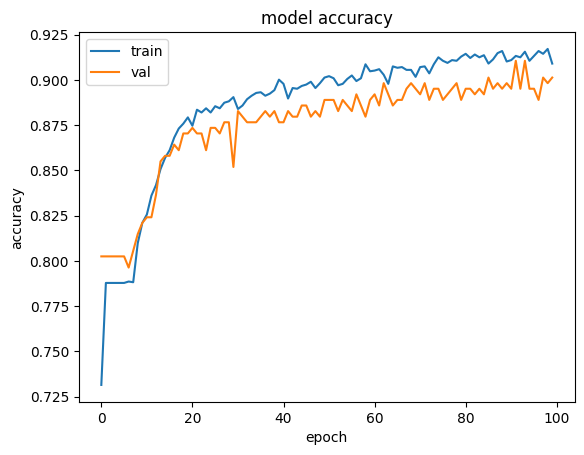

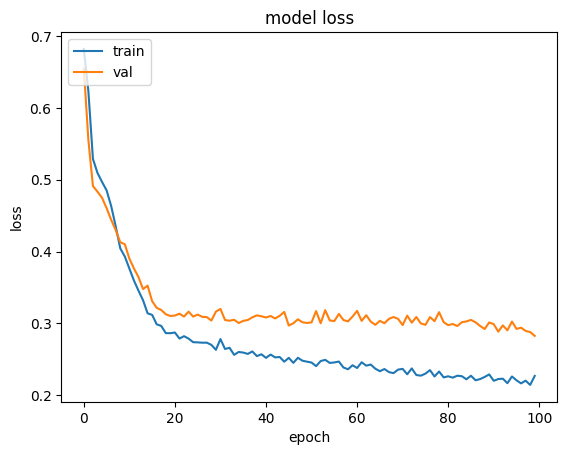

In [ ]:
#Plot training, validation and test set accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#Plot training, validation and test set loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 10-fold cross validation

In [ ]:
#10 fold cross validation
from sklearn.model_selection import KFold
import numpy as np

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((train_data, valid_data), axis=0)
targets = np.concatenate((train_labels, valid_labels), axis=0)


# loss_function = sparse_categorical_crossentropy
# no_epochs = 25
# optimizer = Adam()
# # verbosity = 1
num_folds = 10

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)


num_classes = 2
epochs = 100
batch_size = 256
timesteps = 1000
data_dim = 2
input_shape = (timesteps, data_dim)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv1D(4, kernel_size=6, strides=1, activation='relu', input_shape=input_shape))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(4, kernel_size=5, strides=1, activation='relu'))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(10, kernel_size=4, strides=1, activation='relu'))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(10, kernel_size=4, strides=1, activation='relu'))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(15, kernel_size=4, strides=1, activation='relu'))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # Compile the model
  # cross_valid_model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 4s 9ms/step - loss: 0.1035 - accuracy: 0.9649
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 0.1007 - accuracy: 0.9634
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0914 - accuracy: 0.9638
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0877 - accuracy: 0.9668
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0841 - accuracy: 0.9703
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0866 - accuracy: 0.9668
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0837 - accuracy: 0.9684
Epoch 8/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0923 - accuracy: 0.9627
Epoch 9/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0883 - accuracy: 0.9657
Epoch 10/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0786 - accuracy: 0.9649
Epoch 11/100
11/11 [=

In [ ]:
from sklearn.metrics import classification_report

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# 透過convert_to_labels 將one-hot-encode的資料轉成label
def convert_to_labels(X):
  return np.argmax(X, axis=1)

[[9.99998689e-01 1.28283989e-06]
 [9.63871216e-18 1.00000000e+00]
 [1.00000000e+00 4.41242898e-21]
 [1.00000000e+00 1.37530520e-08]
 [9.97942626e-01 2.05735769e-03]
 [1.92846311e-03 9.98071611e-01]
 [4.90903020e-01 5.09096980e-01]
 [9.64299500e-01 3.57005261e-02]
 [1.48965118e-12 1.00000000e+00]
 [9.99614596e-01 3.85353400e-04]
 [9.95488107e-01 4.51183971e-03]
 [1.86558172e-01 8.13441813e-01]
 [8.51837351e-11 1.00000000e+00]
 [1.30544994e-02 9.86945450e-01]
 [9.99990940e-01 9.06363039e-06]
 [2.50869037e-09 1.00000000e+00]
 [9.99029875e-01 9.70135909e-04]
 [9.99444425e-01 5.55515115e-04]
 [9.99956369e-01 4.36288137e-05]
 [1.00000000e+00 5.18082743e-10]
 [9.44740713e-01 5.52592985e-02]
 [9.99998927e-01 1.12819873e-06]
 [3.99332196e-02 9.60066736e-01]
 [1.58511175e-05 9.99984145e-01]
 [9.97117758e-01 2.88222637e-03]
 [9.28447425e-01 7.15526044e-02]
 [1.00000000e+00 1.14377548e-15]
 [2.18266505e-05 9.99978185e-01]
 [9.99663353e-01 3.36697238e-04]
 [1.16950041e-02 9.88304973e-01]
 [9.369443

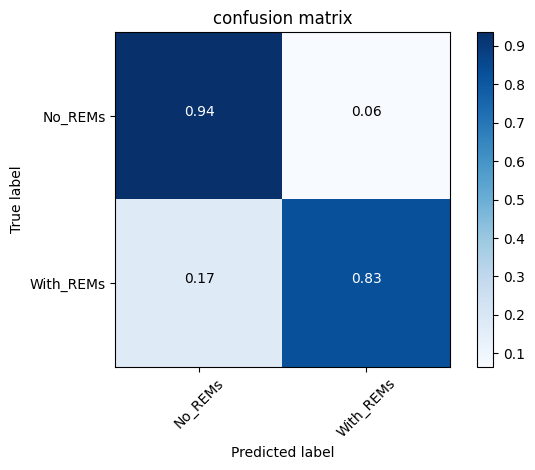

In [ ]:
#  Generate confudion matrix(main function)
y_predict = model.predict(test_data, batch_size=None, verbose=0, steps=None)
print(y_predict)
y_pred = convert_to_labels(y_predict)
print(y_pred)
y_true = test_labels
target_names = ['No_REMs','With_REMs']
print(classification_report(y_true, y_pred, target_names=target_names))
print ("**************************************************************")








plt.figure()
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True, title='confusion matrix')

plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 995, 4)            52        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 497, 4)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 493, 4)            84        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 246, 4)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 243, 10)           170       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 121, 10)          0

# Grad-CAM

In [ ]:
from keras import backend as K
def gradcam(model, x):
    # 取得影像的分類類別
    preds = model.predict(x)
    pred_class = np.argmax(preds)

    # # 取得影像分類名稱
    # pred_class_name = imagenet_utils.decode_predictions(preds)[0][0][1]

    # 預測分類的輸出向量
    pred_output = model.output[:, pred_class]

    # 最後一層 convolution layer 輸出的 feature map
    # ResNet 的最後一層 convolution layer
    last_conv_layer = model.get_layer(index=9)

    # 求得分類的神經元對於最後一層 convolution layer 的梯度
    grads = K.gradients(pred_output, last_conv_layer.output)[0]

    # 求得針對每個 feature map 的梯度加總
    pooled_grads = K.sum(grads, axis=(0, 1, 2))

    # K.function() 讓我們可以藉由輸入影像至 `model.input` 得到 `pooled_grads` 與
    # `last_conv_layer[0]` 的輸出值，像似在 Tensorflow 中定義計算圖後使用 feed_dict
    # 的方式。
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    # 傳入影像矩陣 x，並得到分類對 feature map 的梯度與最後一層 convolution layer 的
    # feature map
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # 將 feature map 乘以權重，等於該 feature map 中的某些區域對於該分類的重要性
    for i in range(pooled_grads_value.shape[0]):
        conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])

    # 計算 feature map 的 channel-wise 加總
    heatmap = np.sum(conv_layer_output_value, axis=-1)

    return heatmap, pred_class

1/1 [==============================] - 0s 25ms/step


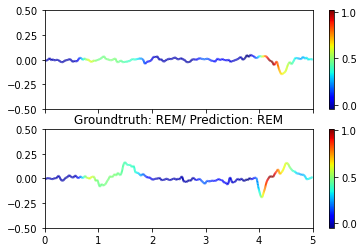

1/1 [==============================] - 0s 23ms/step


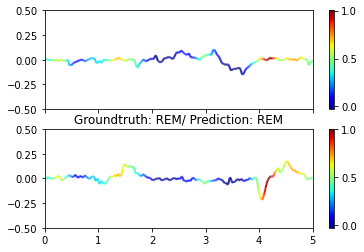

1/1 [==============================] - 0s 16ms/step


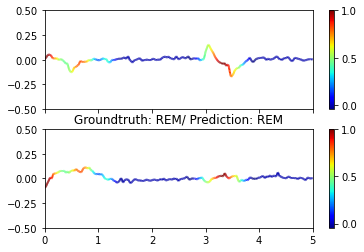

1/1 [==============================] - 0s 16ms/step


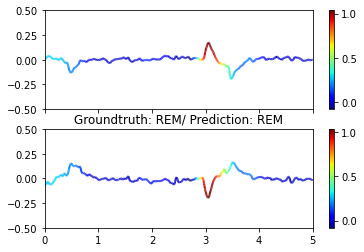

1/1 [==============================] - 0s 16ms/step


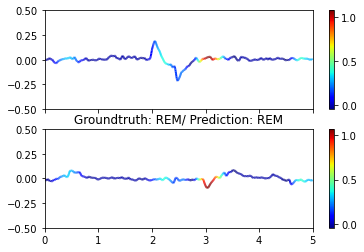

1/1 [==============================] - 0s 18ms/step


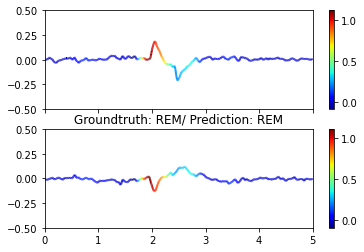

1/1 [==============================] - 0s 15ms/step


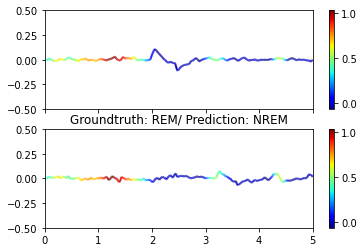

1/1 [==============================] - 0s 17ms/step


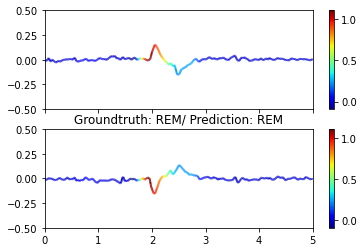

1/1 [==============================] - 0s 14ms/step


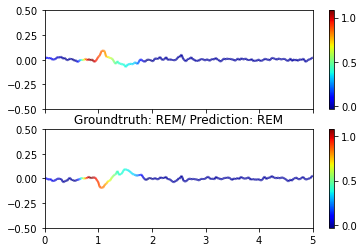

1/1 [==============================] - 0s 16ms/step


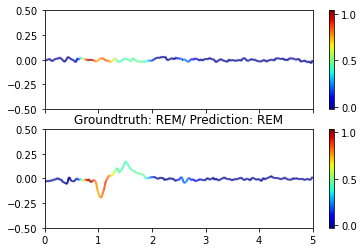

1/1 [==============================] - 0s 15ms/step


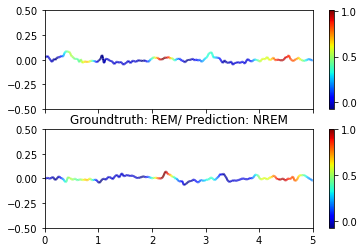

1/1 [==============================] - 0s 15ms/step


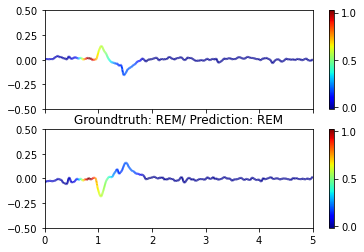

1/1 [==============================] - 0s 16ms/step


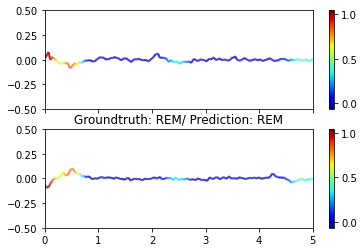

1/1 [==============================] - 0s 19ms/step


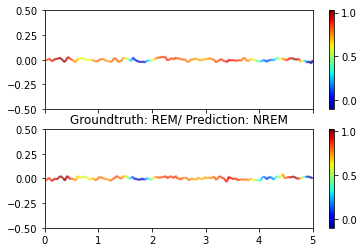

1/1 [==============================] - 0s 16ms/step


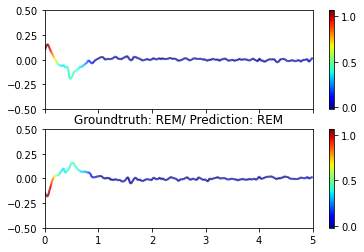

1/1 [==============================] - 0s 15ms/step


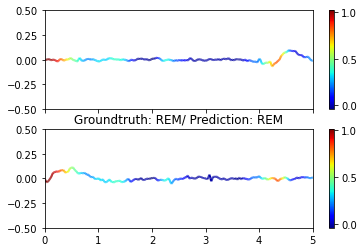

1/1 [==============================] - 0s 16ms/step


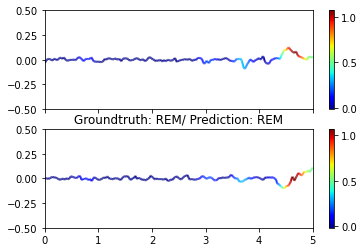

1/1 [==============================] - 0s 16ms/step


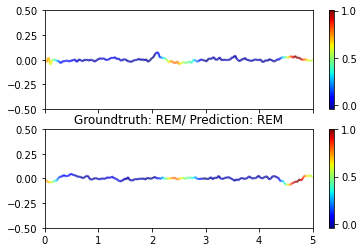

1/1 [==============================] - 0s 17ms/step


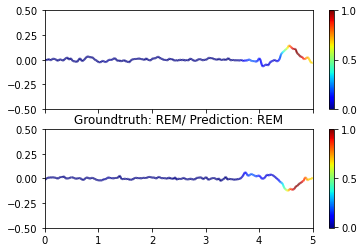

1/1 [==============================] - 0s 16ms/step


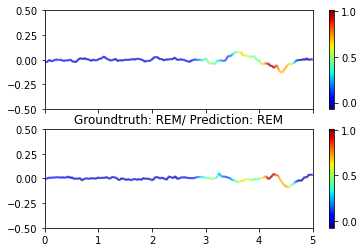

In [ ]:
# 1d-cnn grad-cam
from tensorflow.keras import models
import tensorflow.keras.backend as K
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

last_conv_layer = model.get_layer(index=9)
heatmap_model = models.Model([model.input], [last_conv_layer.output, model.output])

for i in range(200,220):
  preds = model.predict(test_data[i:i+1,:,:])
  pred_class = np.argmax(preds)
  with tf.GradientTape() as gtape:
    conv_output, Predictions = heatmap_model(test_data[i:i+1,:,:])
    prob = Predictions[:, np.argmax(Predictions[0])]
    grads = gtape.gradient(prob, conv_output)
    pooled_grads = K.mean(grads, axis=(0,1))


  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
  heatmap = np.maximum(heatmap,0)
  max_heat = np.max(heatmap)
  if max_heat == 0:
    max_heat = 1e-10
  heatmap /= max_heat


  heatmap1 = cv2.resize(heatmap,(1000,1), interpolation=cv2.INTER_CUBIC)
  # print(heatmap1.shape)
  heatmap_weight = heatmap1[0]
  # print(heatmap_weight.shape)


  time = np.linspace(0, 5, 1000)
  EOG1 = test_data[i,:,0]#SELECT DATA
  EOG2 = test_data[i,:,1]#SELECT DATA

  EOG1_points = np.array([time, EOG1]).T.reshape(-1, 1, 2)
  EOG2_points = np.array([time, EOG2]).T.reshape(-1, 1, 2)
  EOG1_segments = np.concatenate([EOG1_points[:-1], EOG1_points[1:]], axis=1)
  EOG2_segments = np.concatenate([EOG2_points[:-1], EOG2_points[1:]], axis=1)

  fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

  # Create a continuous norm to map from data points to colors
  norm = plt.Normalize(heatmap_weight.min(), heatmap_weight.max())
  EOG1_lc = LineCollection(EOG1_segments, cmap='jet', norm=norm)
  EOG2_lc = LineCollection(EOG2_segments, cmap='jet', norm=norm)
  # Set the values used for colormapping
  EOG1_lc.set_array(heatmap_weight)
  EOG2_lc.set_array(heatmap_weight)
  EOG1_lc.set_linewidth(2)
  EOG2_lc.set_linewidth(2)
  EOG1_line = axs[0].add_collection(EOG1_lc)
  EOG2_line = axs[1].add_collection(EOG2_lc)
  fig.colorbar(EOG1_line, ax=axs[0])
  fig.colorbar(EOG2_line, ax=axs[1])

  axs[0].set_xlim(time.min(), time.max())
  axs[0].set_ylim(-0.5, 0.5)

  if(pred_class==1):
    if(test_labels[i]==1):
      plt.title('Groundtruth: REM/ Prediction: REM')
    elif(test_labels[i]==0):
      plt.title('Groundtruth: NREM/ Prediction: REM')
  elif(pred_class==0):
    if(test_labels[i]==1):
      plt.title('Groundtruth: REM/ Prediction: NREM')
    elif(test_labels[i]==0):
      plt.title('Groundtruth: NREM/ Prediction: NREM')

  plt.show()


In [ ]:
# 1d-cnn grad-cam
from tensorflow.keras import models
import tensorflow.keras.backend as K
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

last_conv_layer = model.get_layer(index=9)
heatmap_model = models.Model([model.input], [last_conv_layer.output, model.output])

for i in range(200,220):
  preds = model.predict(test_data[i:i+1,:,:])
  pred_class = np.argmax(preds)
  with tf.GradientTape() as gtape:
    conv_output, Predictions = heatmap_model(test_data[i:i+1,:,:])
    prob = Predictions[:, np.argmax(Predictions[0])]
    grads = gtape.gradient(prob, conv_output)
    pooled_grads = K.mean(grads, axis=(0,1))


  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    # 傳入影像矩陣 x，並得到分類對 feature map 的梯度與最後一層 convolution layer 的
    # feature map
  pooled_grads_value, conv_layer_output_value = iterate([x])

    # 將 feature map 乘以權重，等於該 feature map 中的某些區域對於該分類的重要性
  for i in range(pooled_grads_value.shape[0]):
      conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])



  # heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
  heatmap = np.sum(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap,0)
  max_heat = np.max(heatmap)
  if max_heat == 0:
    max_heat = 1e-10
  heatmap /= max_heat


  heatmap1 = cv2.resize(heatmap,(1000,1), interpolation=cv2.INTER_CUBIC)
  # print(heatmap1.shape)
  heatmap_weight = heatmap1[0]
  # print(heatmap_weight.shape)


  time = np.linspace(0, 5, 1000)
  EOG1 = test_data[i,:,0]#SELECT DATA
  EOG2 = test_data[i,:,1]#SELECT DATA

  EOG1_points = np.array([time, EOG1]).T.reshape(-1, 1, 2)
  EOG2_points = np.array([time, EOG2]).T.reshape(-1, 1, 2)
  EOG1_segments = np.concatenate([EOG1_points[:-1], EOG1_points[1:]], axis=1)
  EOG2_segments = np.concatenate([EOG2_points[:-1], EOG2_points[1:]], axis=1)

  fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

  # Create a continuous norm to map from data points to colors
  norm = plt.Normalize(heatmap_weight.min(), heatmap_weight.max())
  EOG1_lc = LineCollection(EOG1_segments, cmap='jet', norm=norm)
  EOG2_lc = LineCollection(EOG2_segments, cmap='jet', norm=norm)
  # Set the values used for colormapping
  EOG1_lc.set_array(heatmap_weight)
  EOG2_lc.set_array(heatmap_weight)
  EOG1_lc.set_linewidth(2)
  EOG2_lc.set_linewidth(2)
  EOG1_line = axs[0].add_collection(EOG1_lc)
  EOG2_line = axs[1].add_collection(EOG2_lc)
  fig.colorbar(EOG1_line, ax=axs[0])
  fig.colorbar(EOG2_line, ax=axs[1])

  axs[0].set_xlim(time.min(), time.max())
  axs[0].set_ylim(-0.5, 0.5)

  if(pred_class==1):
    if(test_labels[i]==1):
      plt.title('Groundtruth: REM/ Prediction: REM')
    elif(test_labels[i]==0):
      plt.title('Groundtruth: NREM/ Prediction: REM')
  elif(pred_class==0):
    if(test_labels[i]==1):
      plt.title('Groundtruth: REM/ Prediction: NREM')
    elif(test_labels[i]==0):
      plt.title('Groundtruth: NREM/ Prediction: NREM')

  plt.show()


In [ ]:
from tensorflow.keras import models
last_conv_layer = model.get_layer(index=9)
heatmap_model = models.Model([model.input], [last_conv_layer.output, model.output])

import tensorflow.keras.backend as K
with tf.GradientTape() as gtape:
  conv_output, Predictions = heatmap_model(test_data[10:11,:,:])#SELECT DATA
  prob = Predictions[:, np.argmax(Predictions[0])]
  grads = gtape.gradient(prob, conv_output)
  pooled_grads = K.mean(grads, axis=(0,1))
print(grads.shape)
print(pooled_grads)
print(conv_output.shape)

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap,0)
max_heat = np.max(heatmap)
if max_heat == 0:
  max_heat = 1e-10
heatmap /= max_heat




(1, 28, 15)
tf.Tensor(
[ 9.1740321e-07 -5.8693917e-07 -6.4203505e-07 -3.4741112e-07
 -3.4780280e-07  4.0009243e-07  8.6509499e-07  7.5450134e-07
  1.1156213e-06 -6.3107876e-07 -7.6093971e-07  1.3678480e-06
  9.4581577e-07 -6.9664964e-07  1.1597050e-06], shape=(15,), dtype=float32)
(1, 28, 15)


(1, 28)


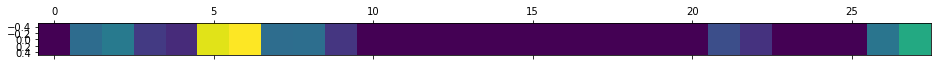

In [ ]:
print(heatmap.shape)
plt.matshow(heatmap, cmap='viridis')

In [ ]:
import cv2
heatmap1 = cv2.resize(heatmap,(1000,1), interpolation=cv2.INTER_CUBIC)
print(heatmap1.shape)
heatmap_weight = heatmap1[0]
print(heatmap_weight.shape)
# heatmap1 = np.uint8(255*heatmap1)
# heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)

(1, 1000)
(1000,)


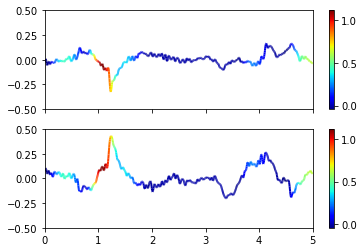

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

time = np.linspace(0, 5, 1000)
EOG1 = test_data[10,:,0]#SELECT DATA
EOG2 = test_data[10,:,1]#SELECT DATA

EOG1_points = np.array([time, EOG1]).T.reshape(-1, 1, 2)
EOG2_points = np.array([time, EOG2]).T.reshape(-1, 1, 2)
EOG1_segments = np.concatenate([EOG1_points[:-1], EOG1_points[1:]], axis=1)
EOG2_segments = np.concatenate([EOG2_points[:-1], EOG2_points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(heatmap_weight.min(), heatmap_weight.max())
EOG1_lc = LineCollection(EOG1_segments, cmap='jet', norm=norm)
EOG2_lc = LineCollection(EOG2_segments, cmap='jet', norm=norm)
# Set the values used for colormapping
EOG1_lc.set_array(heatmap_weight)
EOG2_lc.set_array(heatmap_weight)
EOG1_lc.set_linewidth(2)
EOG2_lc.set_linewidth(2)
EOG1_line = axs[0].add_collection(EOG1_lc)
EOG2_line = axs[1].add_collection(EOG2_lc)
fig.colorbar(EOG1_line, ax=axs[0])
fig.colorbar(EOG2_line, ax=axs[1])

axs[0].set_xlim(time.min(), time.max())
axs[0].set_ylim(-0.5, 0.5)
plt.show()

(1, 1000, 3)


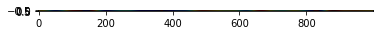

In [ ]:
print(heatmap1.shape)
plt.figure()
plt.imshow(heatmap1)

In [ ]:
def plot_heatmap(heatmap, img, pred_class, REM_or_NREM, fig_name):
    # ReLU
    heatmap = np.maximum(heatmap, 0)

    # 正規化
    heatmap /= np.max(heatmap)

    # # 讀取影像
    # img = cv2.imread(img_path)

    fig, ax = plt.subplots()

    im = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (img.shape[1], img.shape[0]))

    # 拉伸 heatmap
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap = np.uint8(255 * heatmap)

    # 以 0.6 透明度繪製原始影像
    ax.imshow(im, alpha=0.6)

    # 以 0.4 透明度繪製熱力圖
    ax.imshow(heatmap, cmap='jet', alpha=0.4)


    plt.title(str(pred_class))

    # Save figure
    figure_name = r'/content/drive/MyDrive/DREAMS_data/SMOTE_5s_based_regenerated_balanced_data/CAM_SMOTE_with_without_REMs_phase_shift_80%_overlap/'+ REM_or_NREM + '/' + fig_name
    plt.axis('off')
    plt.savefig(figure_name)

    plt.show()



In [ ]:
for i in range(0,100):
  # img = processing_image(images[i,:,:,:])

  heatmap, pred_class_name = gradcam(model, test_images[i:i+1,:,:,:])

  if(pred_class_name==1):
    if(test_labels[i]==1):
      plot_heatmap(heatmap, test_images[i,:,:,:], 'Prediction: REMs', 'REMs', str(i) + '(Groundtruth: REMs)')
    elif(test_labels[i]==0):
      plot_heatmap(heatmap, test_images[i,:,:,:], 'Prediction: REMs', 'REMs', str(i) + '(Groundtruth: NREMs)')
  elif(pred_class_name==0):
    if(test_labels[i]==1):
      plot_heatmap(heatmap, test_images[i,:,:,:], 'Prediction: NREMs', 'NREMs', str(i) + '(Groundtruth: REMs)')
    elif(test_labels[i]==0):
      plot_heatmap(heatmap, test_images[i,:,:,:], 'Prediction: NREMs', 'NREMs', str(i) + '(Groundtruth: NREMs)')

In [ ]:
model.summary

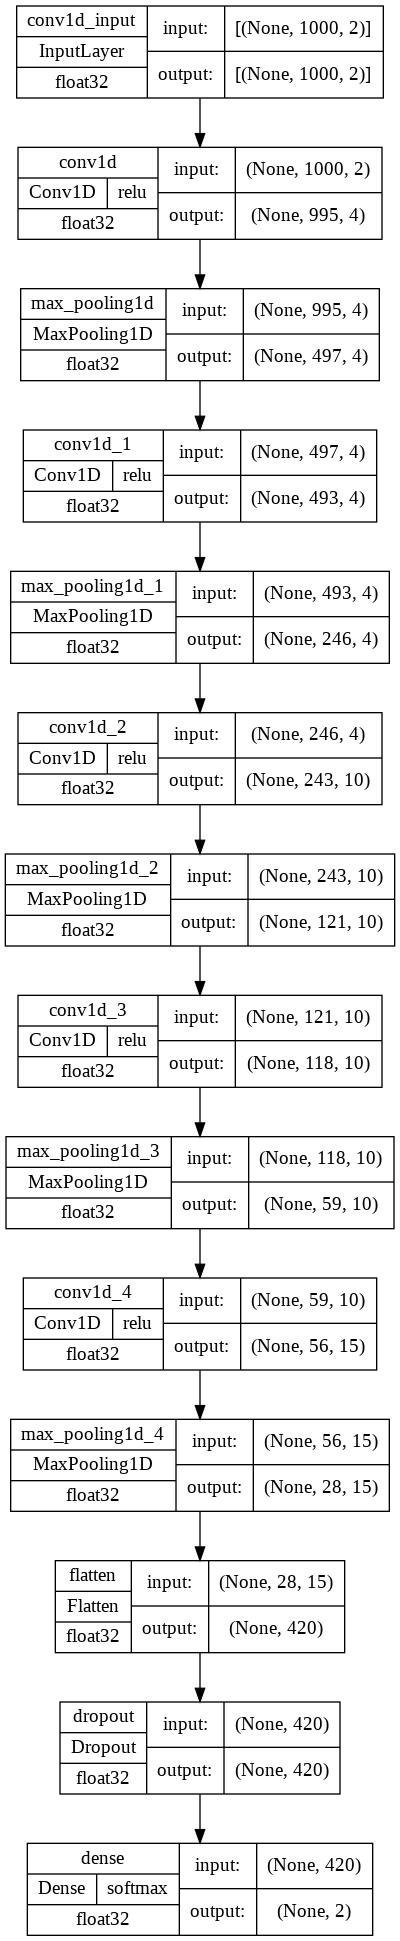

In [ ]:
# 顯示model in detail
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)